# Caracterización y elección de modelos.


La diabetes es una enfermedad que se presenta cuando el nivel de glucosa en la sangre se eleva, lo que en última instancia conduce a otros problemas de salud como enfermedades cardíacas, enfermedades renales, etc. La diabetes se debe principalmente al consumo de alimentos altamente procesados, malos hábitos de consumo, etc. Según la Organización Mundial de la Salud, el número de personas con diabetes ha aumentado con los años.


Un hospital quiere aplicar herramientas de análisis de datos para mejorar el diagnóstico de esta enfemedad, y aprovechar al máximo los recursos que tiene (es decir, los médicos). Para ello, recurre a los estudiantes de Acámica. 


Este hopital les provee una base de datos con numerosos datos/estudios de pacientes, algunos de ellos con diabetes y otros a quienes los médicos escartaron que tienen esa enfermedad. Lo que al hospital le interesa es que utilicen esta base de datos para identificar <b> pacientes con riesgo </b> de tener diabetes. Una vez identificados, el diagnóstico se efectuará por un médico de carne y hueso. 

Para efectuar esta tarea, los estudiantes de Acámica deberán desarrollar un protocolo de Machine Learning. Pero antes, deben pensar los objetivos de ese protocolo en función de los requerimientos del Hospital. Por ejemplo:
1. ¿Conviene elegir el algoritmo de ML que más score tiene? ¿O conviene elegir un modelo un poco peor, pero que tega pocos falsos negativos? ¿O falsos positivos?
1. ¿Conviene usar un test_set? ¿O conviene usar todos los datos para entrenar el algoritmo?

### Guía para el desarrollo del producto. 


<b>(a) Preparación e investigación del Data Set:</b>
1. Cargar el Dataset "acamica_diabetes" para poder empezar a trabajar.
1. Hacerse amigue del Data Set. Por ejemplo, ¿Qué columnas tiene? ¿Son numéricas? ¿Cuántas instacias son? etc.
1. Separar los datos de entrenamiento y test.
1. Proponer y realizar un método de preprocesamiento de datos, preguntándose: ¿Tiene NaNs? ¿Todas las columnas sirven para el análisis? ¿Existen outliers? Etc.

<b>(b) Entrenamiento de Algoritmos. </b> Entrenar tres (o más) algoritmos de Aprendizaje Supervisado visto en clase con los datos procesados en (a). Les proponemos utilizar los modelos de Random Forest, Adaboost o Ensemble por votación (por ejemplo, con SVM, RF y KNN), pero pueden utilizar los que más les parezca. Para cada uno:
1. Realizar un GridSearch con Cross Validation para encontrar la combinación óptima de hiperparámetros del modelo elegido.
1. Reportar el score del Gridsearch sobre los datos de entrenamiento y validación. [No olviden de fijarse si los datos deben ser normalizados antes de realizar el Grid Search].
1.  Entrenar el modelo que surja del GridSearch con los datos de entrenamiento.<br><br>
1. Reportar la matriz de confusión, el accuracy sobre los datos de entrenamiento, validación (del Cross Validation) y test ,y la curva ROC. 

<b>(c) Elección del mejor modelo. </b> En función de las métricas que obtuvieron para cada modelo, elegir el mejor según lo requerido por el Hospital. Discutir y justificar POR ESCRITO lo que pensaron a la hora de elegirlo. 

<b> Algunos consejos.</b> Para el desarrollo del producto, pueden utilizar como inspiración notebooks que trabajamos previamente en el curso. Y GOOGLEAR antes de rendirse. 

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [184]:
df = pd.read_csv('acamica_diabetes.csv')

In [185]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [186]:
df_bk = df 

In [187]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [188]:
aux = df.isin([0]).sum()
aux.apply(lambda x : (x * 100)/df.shape[0])

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

In [189]:
aux = df.Outcome.value_counts()
aux.apply(lambda x : (x * 100)/df.shape[0])

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

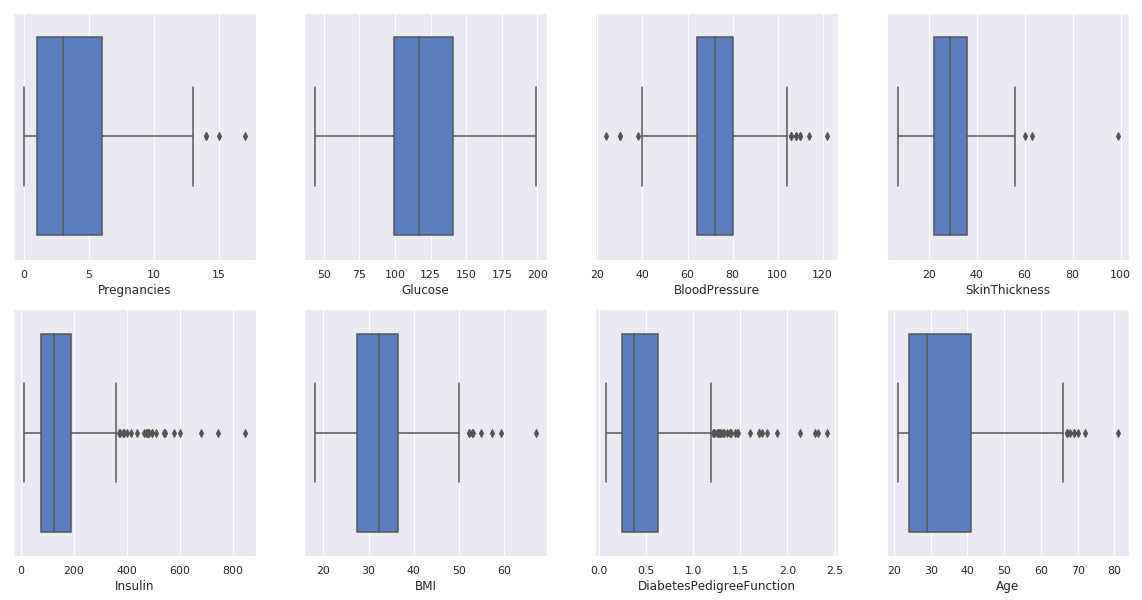

In [190]:
plt.figure(figsize=(20,10))
plt.subplot(241)
sns.boxplot(df['Pregnancies'])
plt.subplot(242)
sns.boxplot(df[df["Glucose"]!=0]["Glucose"])
plt.subplot(243)
sns.boxplot(df[df["BloodPressure"]!=0]["BloodPressure"])
plt.subplot(244)
sns.boxplot(df[df["SkinThickness"]!=0]["SkinThickness"])
plt.subplot(245)
sns.boxplot(df[df["Insulin"]!=0]["Insulin"])
plt.subplot(246)
sns.boxplot(df[df["BMI"]!=0]["BMI"])
plt.subplot(247)
sns.boxplot(df['DiabetesPedigreeFunction'])
plt.subplot(248)
sns.boxplot(df['Age'])
plt.show()

In [191]:
def filtered_column_withOut_outliers(df, column):
    first_quartile, third_quartile = df[column].quantile([0.25, 0.75])
    iqr = third_quartile - first_quartile
    min = first_quartile - (1.5 * iqr)
    max = third_quartile + (1.5 * iqr)
    return df[(df[column] < max) & (df[column] > min)]

In [192]:
df_filtered = filtered_column_withOut_outliers(df[df["Insulin"]!=0], "Insulin")

In [193]:
df_filtered.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
18,1,103,30,38,83,43.3,0.183,33,0
19,1,115,70,30,96,34.6,0.529,32,1
20,3,126,88,41,235,39.3,0.704,27,0
24,11,143,94,33,146,36.6,0.254,51,1
25,10,125,70,26,115,31.1,0.205,41,1


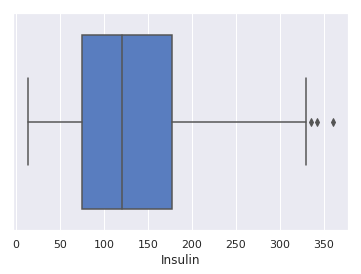

In [194]:
ax = sns.boxplot(x=df_filtered["Insulin"])

In [195]:
from sklearn.preprocessing import Imputer

In [196]:
df["Insulin"] = df["Insulin"].apply(lambda x : x if x in df_filtered["Insulin"] else None)

In [197]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     582
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [198]:
imp = Imputer(strategy='mean')
imp.fit(df_filtered[["Insulin"]])
imp_surface_mean = imp.transform(df[["Insulin"]])                    
df[["Insulin"]] = imp_surface_mean

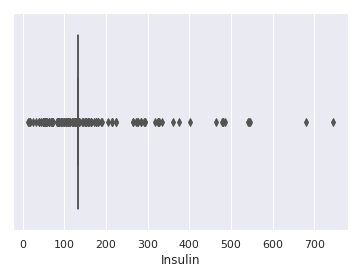

In [199]:
ax = sns.boxplot(x=df["Insulin"])

In [14]:
corr = df.corr()

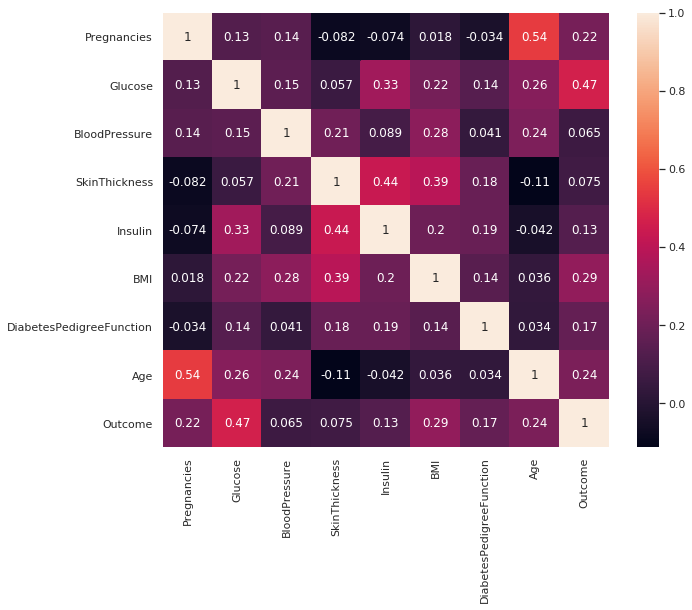

In [15]:
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True)
plt.show()

In [19]:
from sklearn.preprocessing import Normalizer

In [26]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [28]:
columns = X.columns

In [29]:
trasformer = Normalizer().fit(X)

In [30]:
X = pd.DataFrame(trasformer.transform(X), columns=columns) 

In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#param_grid = {'n_estimators':[100, 500, 1000],
 #             'max_depth':[3, 7, None],
  #            'min_samples_split':[2, 3, 10],
   #           'bootstrap':[True, False],
    #          'criterion': ["gini", "entropy"]}
param_grid = {'n_estimators':[100],
              'max_depth':[3],
              'min_samples_split':[2],
              'bootstrap':[False],
              'criterion': ["entropy"]}



randomForest = RandomForestClassifier()
grid_search = GridSearchCV(randomForest,
                           param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1)

In [35]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100], 'max_depth': [3], 'min_samples_split': [2], 'bootstrap': [False], 'criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [36]:
optimised_forest = grid_search.best_estimator_

In [37]:
import numpy as np
import itertools
import matplotlib.pylab as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[95  5]
 [46  8]]


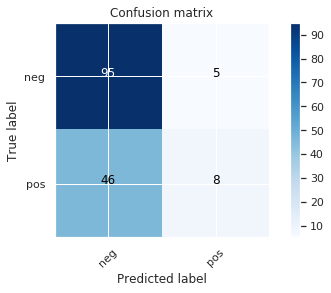

In [39]:
from sklearn.metrics import confusion_matrix

y_pred = optimised_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
target_names = ["neg", "pos"]
plot_confusion_matrix(cm, target_names)

In [40]:
from sklearn.metrics import roc_auc_score, classification_report
print("roc_auc score: {}".format(roc_auc_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=target_names))

roc_auc score: 0.549074074074074
             precision    recall  f1-score   support

        neg       0.67      0.95      0.79       100
        pos       0.62      0.15      0.24        54

avg / total       0.65      0.67      0.60       154

